In [ ]:
import pandas as pd

# Load the data from the uploaded file
file_path = '/content/hive_temperatures.csv'
data = pd.read_csv(file_path, header=None)

# Display the first few rows to understand the structure
data.head()

,0,1
0,record,created_at
1,28.2*2*25.7,2024-07-01 00:00:47
2,23.7*2*21.8,2024-07-01 06:00:47
3,22.8*2*21.2,2024-07-01 12:00:43
4,28.1*2*28.6,2024-07-01 18:00:43


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby(0).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby(1).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp[1].value_counts()
    for x_label, grp in _df_2.groupby(0)
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel(0)
_ = plt.ylabel(1)

In [ ]:
# Split the first column into interior temperature, hive ID, and exterior temperature
data[['interior_temp', 'hive_id', 'exterior_temp']] = data[0].str.split('*', expand=True)

# Convert temperatures to numeric values
data['interior_temp'] = pd.to_numeric(data['interior_temp'], errors='coerce')
data['exterior_temp'] = pd.to_numeric(data['exterior_temp'], errors='coerce')

# Convert the date and time stamp into a datetime format
data['timestamp'] = pd.to_datetime(data[1], errors='coerce')

# Drop the original columns as they are no longer needed
data = data.drop(columns=[0, 1])

# Display the first few rows of the processed data
data.head()


<ipython-input-2-f2a944f677f8>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['timestamp'] = pd.to_datetime(data[1], errors='coerce')


,interior_temp,hive_id,exterior_temp,timestamp
0,NaN,None,NaN,NaT
1,28.2,2,25.7,2024-07-01 00:00:47
2,23.7,2,21.8,2024-07-01 06:00:47
3,22.8,2,21.2,2024-07-01 12:00:43
4,28.1,2,28.6,2024-07-01 18:00:43


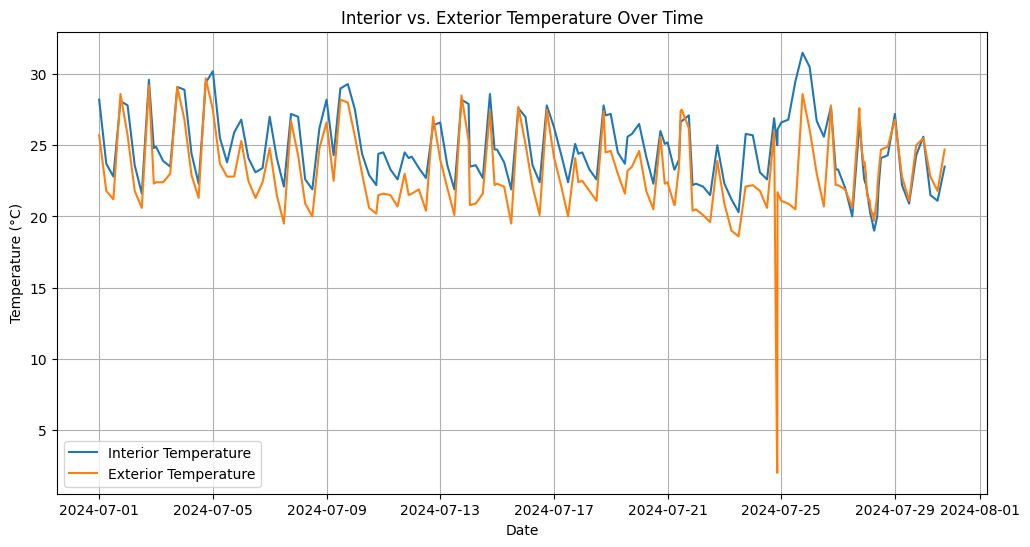

In [ ]:
import matplotlib.pyplot as plt

# Remove the first row (header from the original data)
data = data.dropna(subset=['interior_temp', 'exterior_temp', 'timestamp'])

# Set timestamp as the index for easier plotting
data = data.set_index('timestamp')

# Plot interior vs exterior temperature
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['interior_temp'], label='Interior Temperature')
plt.plot(data.index, data['exterior_temp'], label='Exterior Temperature')
plt.title('Interior vs. Exterior Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Identify outliers in temperature data
# We'll use a simple method: temperatures outside 1.5 times the interquartile range (IQR) are considered outliers

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for both interior and exterior temperatures
Q1_interior = data['interior_temp'].quantile(0.25)
Q3_interior = data['interior_temp'].quantile(0.75)
IQR_interior = Q3_interior - Q1_interior

Q1_exterior = data['exterior_temp'].quantile(0.25)
Q3_exterior = data['exterior_temp'].quantile(0.75)
IQR_exterior = Q3_exterior - Q1_exterior

# Define the outlier bounds
lower_bound_interior = Q1_interior - 1.5 * IQR_interior
upper_bound_interior = Q3_interior + 1.5 * IQR_interior
lower_bound_exterior = Q1_exterior - 1.5 * IQR_exterior
upper_bound_exterior = Q3_exterior + 1.5 * IQR_exterior

# Identify outliers
outliers_interior = data[(data['interior_temp'] < lower_bound_interior) | (data['interior_temp'] > upper_bound_interior)]
outliers_exterior = data[(data['exterior_temp'] < lower_bound_exterior) | (data['exterior_temp'] > upper_bound_exterior)]

# Check the number of outliers identified
outliers_interior_count = outliers_interior.shape[0]
outliers_exterior_count = outliers_exterior.shape[0]

outliers_interior_count, outliers_exterior_count


(0, 2)

        record           created_at
0  28.2*2*25.7  2024-07-01 00:00:47
1  23.7*2*21.8  2024-07-01 06:00:47
2  22.8*2*21.2  2024-07-01 12:00:43
3  28.1*2*28.6  2024-07-01 18:00:43
4  27.8*2*25.7  2024-07-02 00:00:45


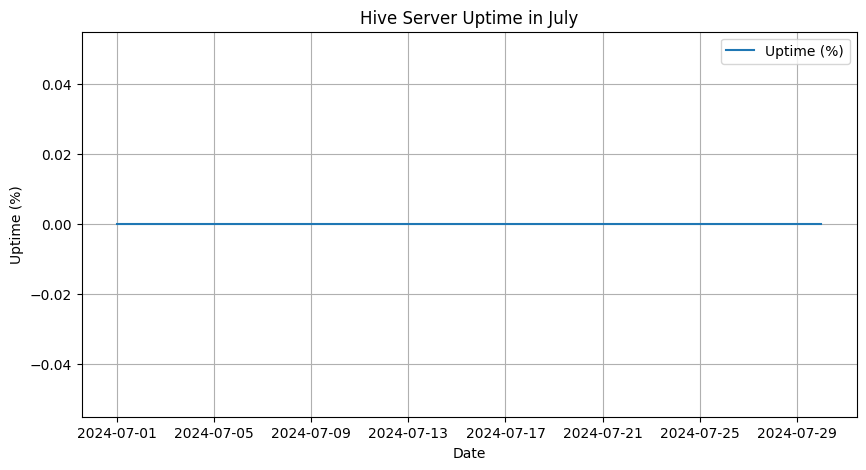

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('/content/hive_temperatures.csv')

# Check the first few rows to understand the structure
print(data.head())

# Process the data similar to what we did before
# Ensure these column names match what's in your data
data[['interior_temp', 'hive_id', 'exterior_temp']] = data.iloc[:, 0].str.split('*', expand=True)
data['timestamp'] = pd.to_datetime(data.iloc[:, 1])
data = data.drop(columns=[data.columns[0], data.columns[1]])

# Assuming the data is from July and the interval is 6 hours
expected_interval = pd.Timedelta(hours=6)
start_date = data['timestamp'].min().normalize()
end_date = data['timestamp'].max().normalize()
date_range = pd.date_range(start=start_date, end=end_date, freq=expected_interval)

# Create a DataFrame with the full date range
uptime_data = pd.DataFrame(date_range, columns=['timestamp'])
uptime_data['present'] = uptime_data['timestamp'].isin(data['timestamp'])

# Calculate the uptime percentage
uptime_percentage = uptime_data['present'].mean() * 100

# Plot uptime over the month
plt.figure(figsize=(10, 5))
uptime_data['timestamp'] = pd.to_datetime(uptime_data['timestamp'])
uptime_data['day'] = uptime_data['timestamp'].dt.date
uptime_per_day = uptime_data.groupby('day')['present'].mean() * 100

plt.plot(uptime_per_day.index, uptime_per_day, label='Uptime (%)')
plt.xlabel('Date')
plt.ylabel('Uptime (%)')
plt.title('Hive Server Uptime in July')
plt.grid(True)
plt.legend()
plt.show()


        record           created_at
0  28.2*2*25.7  2024-07-01 00:00:47
1  23.7*2*21.8  2024-07-01 06:00:47
2  22.8*2*21.2  2024-07-01 12:00:43
3  28.1*2*28.6  2024-07-01 18:00:43
4  27.8*2*25.7  2024-07-02 00:00:45
Total Uptime Percentage: 0.00%
Uptime Percentage Per Day:
day
2024-07-01    0.0
2024-07-02    0.0
2024-07-03    0.0
2024-07-04    0.0
2024-07-05    0.0
2024-07-06    0.0
2024-07-07    0.0
2024-07-08    0.0
2024-07-09    0.0
2024-07-10    0.0
2024-07-11    0.0
2024-07-12    0.0
2024-07-13    0.0
2024-07-14    0.0
2024-07-15    0.0
2024-07-16    0.0
2024-07-17    0.0
2024-07-18    0.0
2024-07-19    0.0
2024-07-20    0.0
2024-07-21    0.0
2024-07-22    0.0
2024-07-23    0.0
2024-07-24    0.0
2024-07-25    0.0
2024-07-26    0.0
2024-07-27    0.0
2024-07-28    0.0
2024-07-29    0.0
2024-07-30    0.0
Name: present, dtype: float64


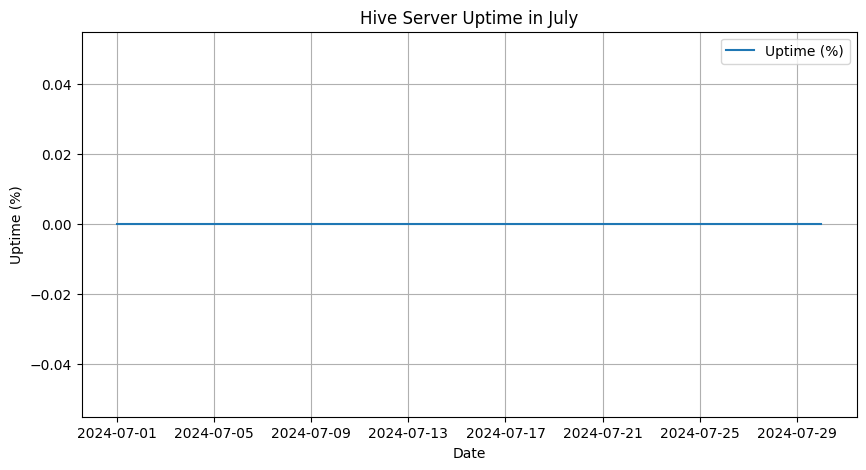

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('/content/hive_temperatures.csv')

# Check the first few rows to understand the structure
print(data.head())

# Process the data similar to what we did before
# Ensure these column names match what's in your data
data[['interior_temp', 'hive_id', 'exterior_temp']] = data.iloc[:, 0].str.split('*', expand=True)
data['timestamp'] = pd.to_datetime(data.iloc[:, 1])
data = data.drop(columns=[data.columns[0], data.columns[1]])

# Assuming the data is from July and the interval is 6 hours
expected_interval = pd.Timedelta(hours=6)
start_date = data['timestamp'].min().normalize()
end_date = data['timestamp'].max().normalize()
date_range = pd.date_range(start=start_date, end=end_date, freq=expected_interval)

# Create a DataFrame with the full date range
uptime_data = pd.DataFrame(date_range, columns=['timestamp'])
uptime_data['present'] = uptime_data['timestamp'].isin(data['timestamp'])

# Calculate the uptime percentage
total_uptime_percentage = uptime_data['present'].mean() * 100
print(f"Total Uptime Percentage: {total_uptime_percentage:.2f}%")

# Calculate uptime per day
uptime_data['day'] = uptime_data['timestamp'].dt.date
uptime_per_day = uptime_data.groupby('day')['present'].mean() * 100

# Print uptime per day
print("Uptime Percentage Per Day:")
print(uptime_per_day)

# Plot uptime over the month
plt.figure(figsize=(10, 5))
plt.plot(uptime_per_day.index, uptime_per_day, label='Uptime (%)')
plt.xlabel('Date')
plt.ylabel('Uptime (%)')
plt.title('Hive Server Uptime in July')
plt.grid(True)
plt.legend()
plt.show()


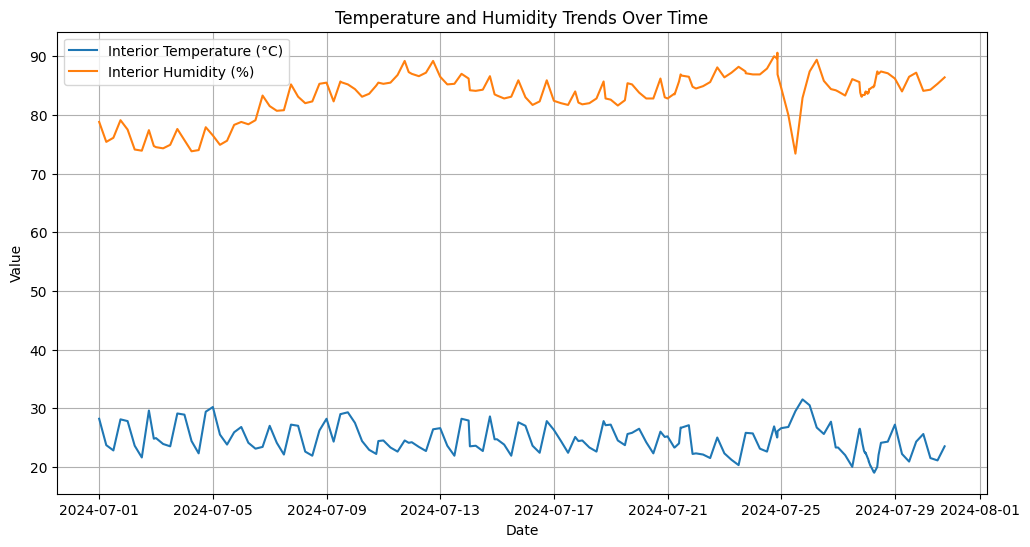

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the temperature data
temperature_data = pd.read_csv('/content/hive_temperatures.csv', header=0)
# Load the humidity data
humidity_data = pd.read_csv('/content/hive_humidity.csv', header=0)

# Process the temperature data
temperature_data[['interior_temp', 'hive_id', 'exterior_temp']] = temperature_data['record'].str.split('*', expand=True)
temperature_data['timestamp'] = pd.to_datetime(temperature_data['created_at'])
temperature_data['interior_temp'] = pd.to_numeric(temperature_data['interior_temp'], errors='coerce')
temperature_data['exterior_temp'] = pd.to_numeric(temperature_data['exterior_temp'], errors='coerce')
temperature_data = temperature_data.drop(columns=['record', 'hive_id'])

# Process the humidity data
humidity_data[['interior_humidity', 'hive_id', 'exterior_humidity']] = humidity_data['record'].str.split('*', expand=True)
humidity_data['timestamp'] = pd.to_datetime(humidity_data['created_at'])
humidity_data['interior_humidity'] = pd.to_numeric(humidity_data['interior_humidity'], errors='coerce')
humidity_data['exterior_humidity'] = pd.to_numeric(humidity_data['exterior_humidity'], errors='coerce')
humidity_data = humidity_data.drop(columns=['record', 'hive_id'])

# Merge temperature and humidity data on timestamps
combined_data = pd.merge(temperature_data, humidity_data, on='timestamp', how='inner')

# Plot temperature vs. humidity trends
plt.figure(figsize=(12, 6))
plt.plot(combined_data['timestamp'], combined_data['interior_temp'], label='Interior Temperature (°C)')
plt.plot(combined_data['timestamp'], combined_data['interior_humidity'], label='Interior Humidity (%)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Temperature and Humidity Trends Over Time')
plt.legend()
plt.grid(True)
plt.show()


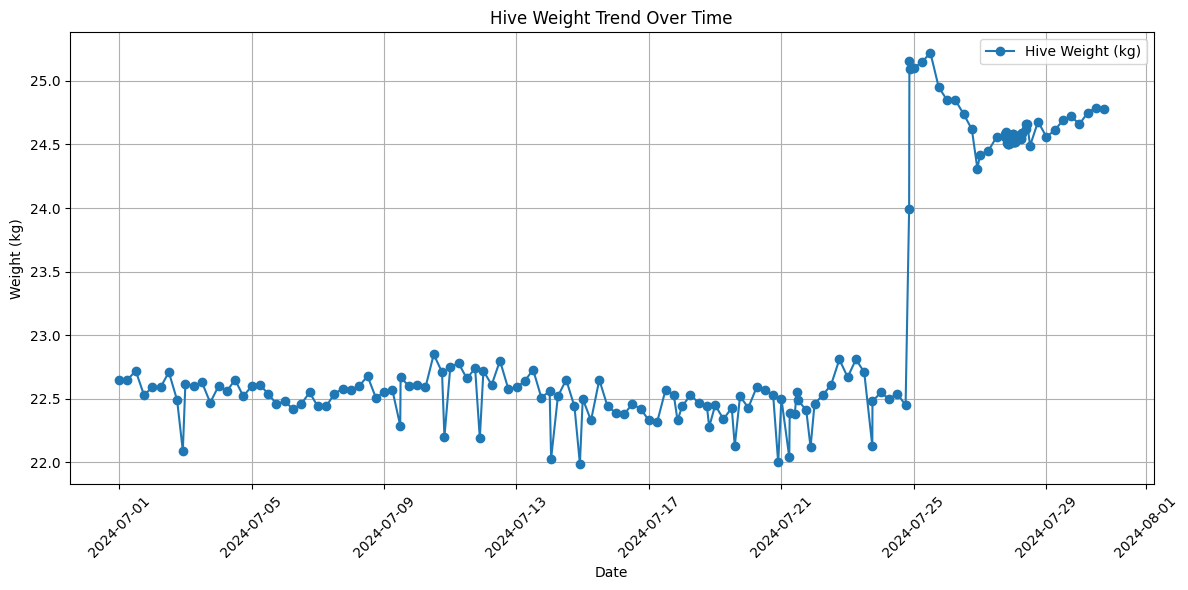

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the weight data
weight_data = pd.read_csv('/content/hive_weights.csv', header=0)

# Process the weight data
weight_data['timestamp'] = pd.to_datetime(weight_data['created_at'])
weight_data['weight'] = pd.to_numeric(weight_data['record'], errors='coerce')

# Plot weight trend
plt.figure(figsize=(12, 6))
plt.plot(weight_data['timestamp'], weight_data['weight'], label='Hive Weight (kg)', marker='o')
plt.xlabel('Date')
plt.ylabel('Weight (kg)')
plt.title('Hive Weight Trend Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()

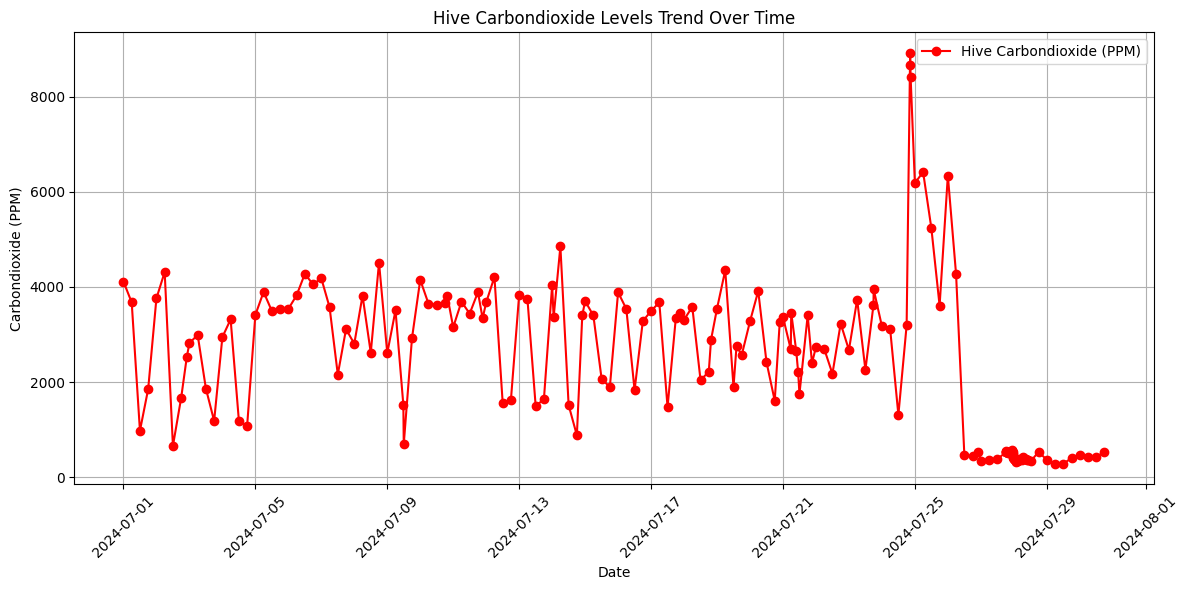

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the carbondioxide data
carbondioxide_data = pd.read_csv('/content/hive_carbondioxide.csv', header=0)

# Process the carbondioxide data
carbondioxide_data['timestamp'] = pd.to_datetime(carbondioxide_data['created_at'])
carbondioxide_data['carbondioxide'] = pd.to_numeric(carbondioxide_data['record'], errors='coerce')

# Plot carbondioxide trend
plt.figure(figsize=(12, 6))
plt.plot(carbondioxide_data['timestamp'], carbondioxide_data['carbondioxide'], label='Hive Carbondioxide (PPM)', marker='o', color='r')
plt.xlabel('Date')
plt.ylabel('Carbondioxide (PPM)')
plt.title('Hive Carbondioxide Levels Trend Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()


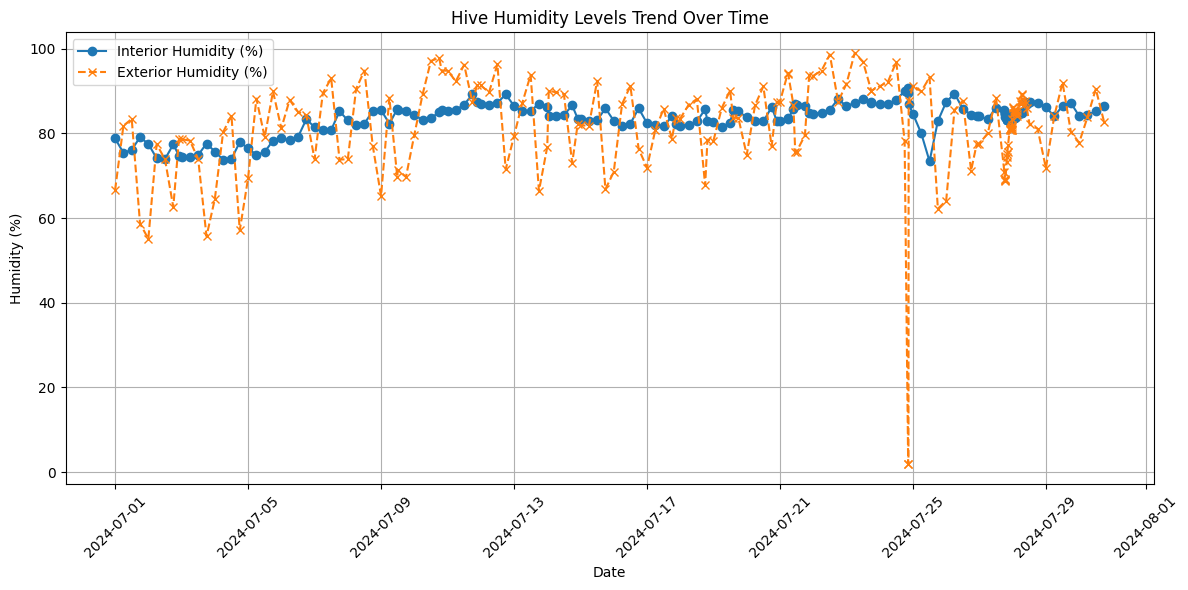

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the humidity data
humidity_data = pd.read_csv('/content/hive_humidity.csv', header=0)

# Process the humidity data
humidity_data[['interior_humidity', 'hive_id', 'exterior_humidity']] = humidity_data['record'].str.split('*', expand=True)
humidity_data['timestamp'] = pd.to_datetime(humidity_data['created_at'])
humidity_data['interior_humidity'] = pd.to_numeric(humidity_data['interior_humidity'], errors='coerce')
humidity_data['exterior_humidity'] = pd.to_numeric(humidity_data['exterior_humidity'], errors='coerce')
humidity_data = humidity_data.drop(columns=['record', 'hive_id'])

# Plot humidity trend
plt.figure(figsize=(12, 6))
plt.plot(humidity_data['timestamp'], humidity_data['interior_humidity'], label='Interior Humidity (%)', marker='o')
plt.plot(humidity_data['timestamp'], humidity_data['exterior_humidity'], label='Exterior Humidity (%)', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.title('Hive Humidity Levels Trend Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
plt.show()
